# **RNN Introduction**


In [1]:
!pip install mplfinance
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


## Importing required libraries


In [2]:
import numpy as np
import pandas as pd
import warnings


# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [3]:
df = pd.read_csv("traffic (1).csv",parse_dates=['DateTime']).iloc[::-1]
df.head()

,DateTime,Junction,Vehicles,ID
48119,2017-06-30 23:00:00,4,12,20170630234
48118,2017-06-30 22:00:00,4,22,20170630224
48117,2017-06-30 21:00:00,4,16,20170630214
48116,2017-06-30 20:00:00,4,30,20170630204
48115,2017-06-30 19:00:00,4,11,20170630194


In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S')
df = pd.DataFrame(df)
df['Hour'] = df['DateTime'].dt.hour
df['month'] = df['DateTime'].dt.month

df.head()

,DateTime,Junction,Vehicles,ID,Hour,month
48119,2017-06-30 23:00:00,4,12,20170630234,23,6
48118,2017-06-30 22:00:00,4,22,20170630224,22,6
48117,2017-06-30 21:00:00,4,16,20170630214,21,6
48116,2017-06-30 20:00:00,4,30,20170630204,20,6
48115,2017-06-30 19:00:00,4,11,20170630194,19,6


In [5]:
df.drop("ID",axis=1)

,DateTime,Junction,Vehicles,Hour,month
48119,2017-06-30 23:00:00,4,12,23,6
48118,2017-06-30 22:00:00,4,22,22,6
48117,2017-06-30 21:00:00,4,16,21,6
48116,2017-06-30 20:00:00,4,30,20,6
48115,2017-06-30 19:00:00,4,11,19,6
...,...,...,...,...,...
4,2015-11-01 04:00:00,1,9,4,11
3,2015-11-01 03:00:00,1,7,3,11
2,2015-11-01 02:00:00,1,10,2,11
1,2015-11-01 01:00:00,1,13,1,11


## Visualization

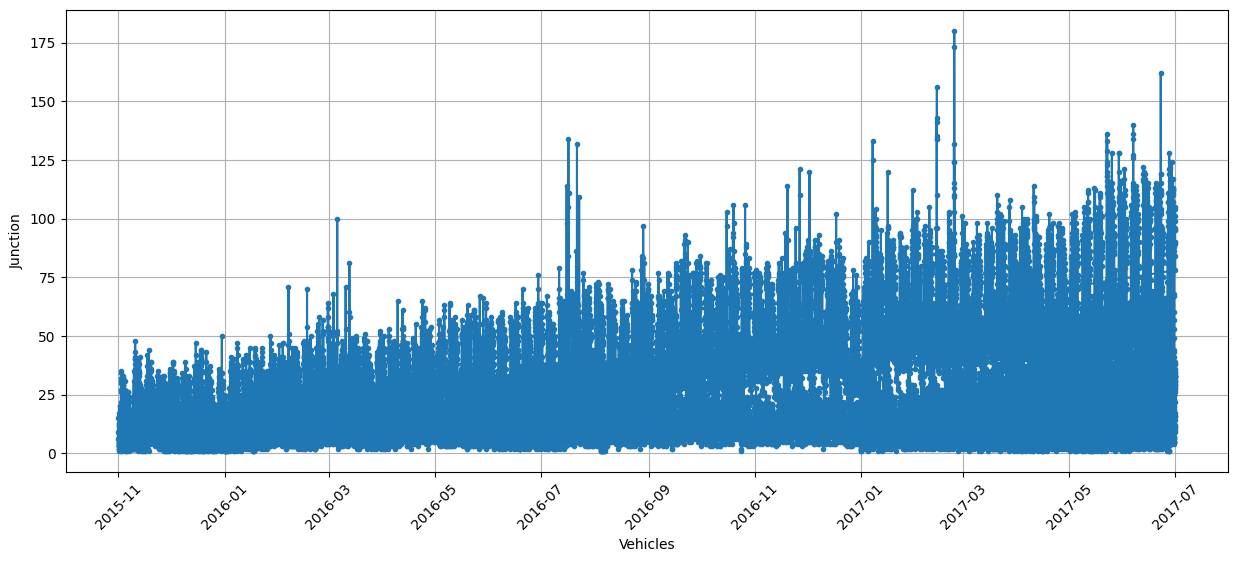

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.xlabel('Vehicles')
plt.ylabel('Junction')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Split the data into train and test

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Vehicles'].values.reshape(-1, 1))

In [14]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [15]:
n_steps = 24
X_train, y_train = [], []
for i in range(n_steps, len(train_data)):
    X_train.append(train_data[i - n_steps:i])
    y_train.append(train_data[i])
X_test, y_test = [], []
for i in range(n_steps, len(test_data)):
    X_test.append(test_data[i - n_steps:i])
    y_test.append(test_data[i])

In [19]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

Streaming output truncated to the last 5000 lines.
       [0.18435754],
       [0.0726257 ],
       [0.07821229],
       [0.0726257 ],
       [0.05027933],
       [0.06145251],
       [0.08938547],
       [0.09497207]]), array([[0.15083799],
       [0.18994413],
       [0.20111732],
       [0.19553073],
       [0.21787709],
       [0.21787709],
       [0.21787709],
       [0.18994413],
       [0.22346369],
       [0.23463687],
       [0.26256983],
       [0.1452514 ],
       [0.19553073],
       [0.20670391],
       [0.21787709],
       [0.18435754],
       [0.0726257 ],
       [0.07821229],
       [0.0726257 ],
       [0.05027933],
       [0.06145251],
       [0.08938547],
       [0.09497207],
       [0.10055866]]), array([[0.18994413],
       [0.20111732],
       [0.19553073],
       [0.21787709],
       [0.21787709],
       [0.21787709],
       [0.18994413],
       [0.22346369],
       [0.23463687],
       [0.26256983],
       [0.1452514 ],
       [0.19553073],
       [0.20670391],


## Modeling


In [21]:
# Initialize a sequential model
model = Sequential()

# First RNN layer with 50 units, input shape, and return sequences
model.add(SimpleRNN(units=50, input_shape=(n_steps, 1), return_sequences=True))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second RNN layer with 50 units and return sequences
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 50 units
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 24, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 24, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=32)

Epoch 1/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 9.0173e-04
Epoch 2/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 9.2588e-04
Epoch 3/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 9.3811e-04
Epoch 4/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - loss: 8.9746e-04
Epoch 5/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 9.0097e-04
Epoch 6/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - loss: 9.0067e-04
Epoch 7/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 8.8709e-04
Epoch 8/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - loss: 8.7933e-04
Epoch 9/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 8.7825e-04
Epoch 10/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 8.7212e-04


In [26]:
model.evaluate(np.array(X_test), np.array(y_test))

300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.3573e-04


0.0006643572123721242

## Visualization of results


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


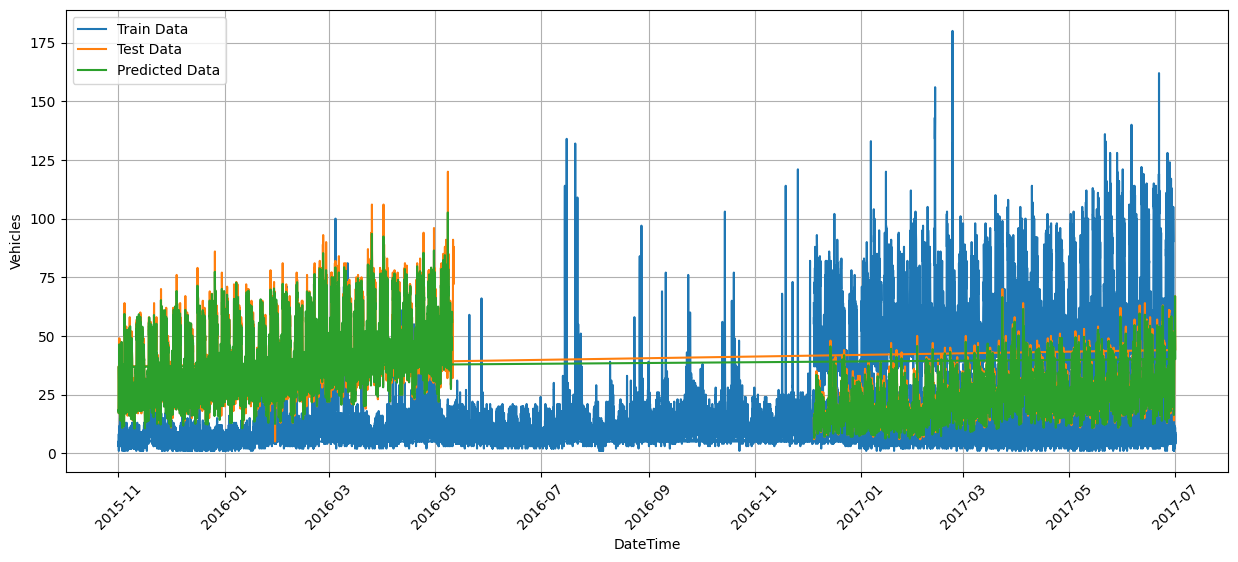

In [30]:
look_back = 24
trainPredict = model.predict(np.array(X_train))
testPredict = model.predict(np.array(X_test))

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'][n_steps:n_steps + len(train_data)],
         scaler.inverse_transform(train_data),
         label='Train Data')
plt.plot(df['DateTime'][n_steps + len(train_data) - len(test_data): n_steps + len(train_data)],  # Sliced to match test_data length
         scaler.inverse_transform(test_data),
         label='Test Data')
plt.plot(df['DateTime'][n_steps + len(train_data) - len(testPredict): n_steps + len(train_data)], # Corrected slicing
         scaler.inverse_transform(testPredict),
         label='Predicted Data')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [32]:

n_past = 24
last_sequence = X_test[-1]

last_sequence = last_sequence.reshape(1, n_past, 1)

predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<ipython-input-32-a3b15496fb91>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = next_day_prediction  # Update the last element with the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = 14.031702041625977
Day 2: Predicted Price = 14.535715103149414
Day 3: Predicted Price = 15.067394256591797
Day 4: Predicted Price = 14.882241249084473
Day 5: Predicted Price = 14.3134765625
Day 6: Predicted Price = 13.6658353805542
Day 7: Predicted Price = 13.2942533493042
Day 8: Predicted Price = 12.804179191589355
Day 9: Predicted Price = 12.575102806091309
Day 10: Predicted Price = 12.50428295135498


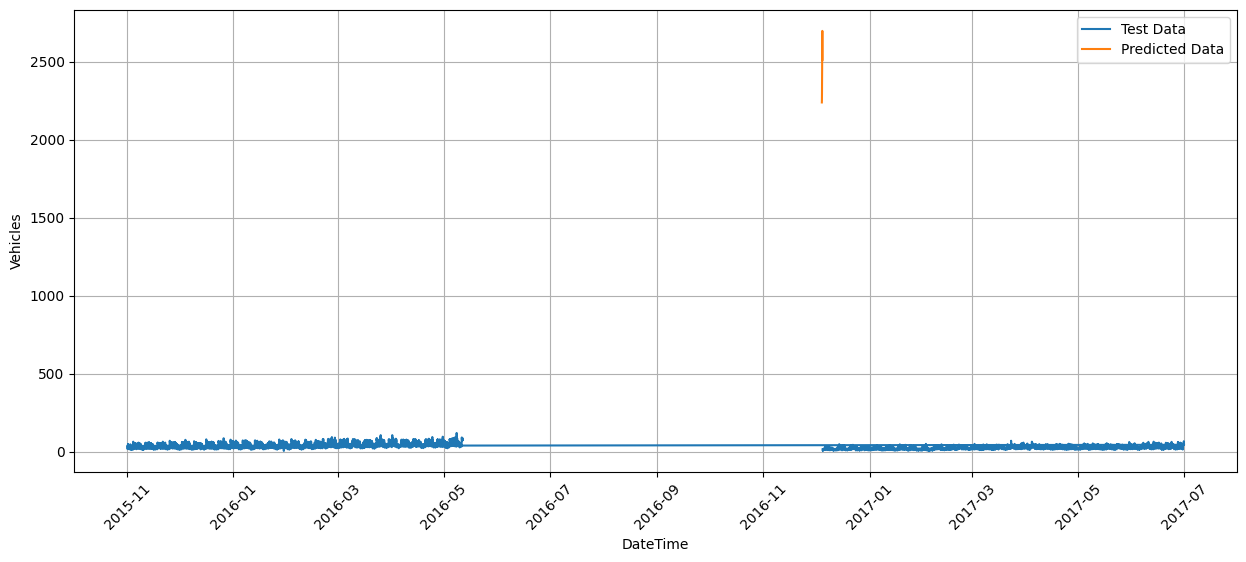

In [35]:
plt.figure(figsize=(15, 6))

plt.plot(df['DateTime'][n_steps + len(train_data) - len(test_data): n_steps + len(train_data)],
         scaler.inverse_transform(test_data),
         label='Test Data')plt.plot(df['DateTime'][n_steps + len(train_data): n_steps + len(train_data) + len(predictions_next_10_days)],
         scaler.inverse_transform(predictions_next_10_days),
         label='Predicted Data')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()